In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def clean_csv(path):
    
    df = pd.read_csv(path,sep=",", header = 4, encoding = "UTF-8")
    df.columns = ["indice","pre","lemme","post"]
    
    df_final = df['lemme'].str.lower().value_counts()
    
    return (df_final)

# Tableau Numéro 1 : Sans prise en compte du biais de la formule "Seruus seruorum dei"

In [10]:
dfA = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Ancilla/Word/Ancilla_complet.csv')
dfC = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Colonus/Colonus_complet.csv')
dfF = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Famulus/Word/Famulus_complet.csv')
dfM = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Mancipium/Word/Mancipium_complet.csv')
dfSerua = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Serua/Word/Serua_complet.csv')
dfSeruus = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/seruus_complet.csv')
dfSC = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Sclauus/Sclauus_complet.csv')

In [15]:
dfSC

sclauorum    79
sclaui       70
sclauo       45
sclauis      31
sclauos      26
sclauus      25
sclauum       4
sclaue        2
Name: lemme, dtype: int64

In [17]:
dfA.index = ['Dat/Abl pl','Acc pl','Nom/Abl sg','Gén pl','Acc sg','Gén sg']
dfC.index = ['Gén sg','Nom sg','Acc pl','Dat/Abl sg','Acc sg','Gén pl']
dfF.index = ['Nom sg','Gén sg','Dat/Abl sg','Acc pl','Gén pl','Acc sg']
dfM.index = ['Dat/Abl pl','Nom/Acc pl','Gén pl','Nom/Acc sg','Dat/Abl sg','Gén sg']
dfSC.index = ['Gén pl','Gén sg','Dat/Abl sg','Dat/Abl pl','Acc pl','Nom sg','Acc sg','Voc sg']
#dfSC = dfSC.drop('error')
dfSerua.index = ['Dat/Abl pl','Acc sg','Nom sg']
dfSeruus.index = ['Gén pl','Nom sg','Acc pl','Gén sg','Acc sg','Dat/Abl sg','Voc sg']

In [18]:
dfSeruus

Gén pl        15433
Nom sg        14645
Acc pl         1865
Gén sg          927
Acc sg          725
Dat/Abl sg      586
Voc sg           53
Name: lemme, dtype: int64

In [23]:
dfA = dfA/dfA.sum()
dfC = dfC/dfC.sum()
dfM = dfM/dfM.sum()
dfF = dfF/dfF.sum()
dfSC = dfSC/dfSC.sum()
dfSerua = dfSerua/dfSerua.sum()
dfSeruus = dfSeruus/dfSeruus.sum()
dfA = dfA.to_frame()

In [27]:
df_outer = dfA.merge(dfM, how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfC,how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfSC,how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfSerua,how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfSeruus,how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfF,how='outer', left_index=True, right_index=True)

/tmp/ipykernel_67930/58323894.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'lemme_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_outer = df_outer.merge(dfSC,how='outer', left_index=True, right_index=True)
/tmp/ipykernel_67930/58323894.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'lemme_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_outer = df_outer.merge(dfSeruus,how='outer', left_index=True, right_index=True)


In [28]:
df_outer.columns = ['Ancilla','Mancipium','Colonus','Sclauus','Serua','Seruus','Famulus']

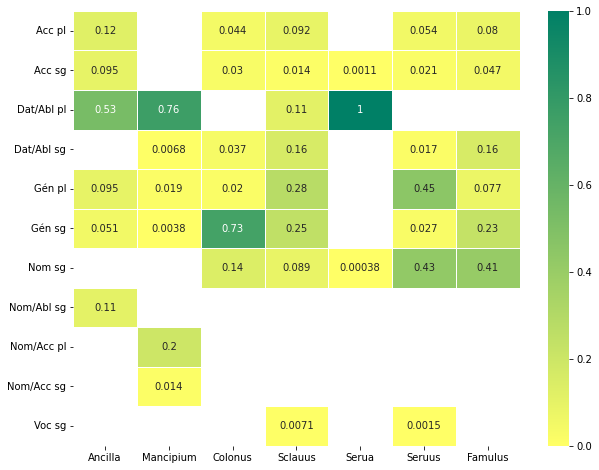

In [29]:
import numpy as np
import seaborn as sns
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_outer,vmin = 0, vmax = 1,annot=True,linewidths = .5,
               cmap='summer_r' )

results_path = 'results.png'
plt.savefig(results_path, dpi=400)

# Tableau numéro 2 : Prise en considération de la formule

In [75]:
dfSeruus = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_word_clean.csv', sep =',',header=4)
dfSeruus.columns = ['texte','pre','lemma','post']
dfSeruus['new'] = dfSeruus['pre'] + (' ') + dfSeruus['lemma']+ (' ') + dfSeruus['post']
dfSeruus['new'] = dfSeruus['new'].str.lower()
dfSeruus['drop'] = dfSeruus['new'].str.find('seruus seruorum dei')
dfSeruus = dfSeruus[dfSeruus['drop'] == -1]
dfSeruus = dfSeruus.drop('texte',axis=1)
dfSEruus = dfSeruus.drop("drop", axis=1)
dfSeruus = pd.DataFrame(dfSeruus['lemma'].str.lower().value_counts())

In [74]:
dfA = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Ancilla/Ancilla_complet.csv')
dfC = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Colonus/Colonus_complet.csv')
dfF = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Famulus/Famulus_complet.csv')
dfM = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Mancipium/Mancipium_complet.csv')
dfSerua = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Serua/Serua_complet.csv')
dfSC = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Sclauus/Sclauus_complet.csv')

In [29]:
dfSeruus = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_nettoye.csv', sep=",",header = 4,encoding = 'UTF-8')
dfSeruus.columns = ['numero','1','lemma','pos']
df2 = dfSeruus['pos'].str.split((' '))
df3 = dfSeruus['lemma']

for i in range(len(dfSeruus)):
    string = df2[i][0]
    lemma = df3[i]
    if lemma == "seruus" or lemma == "Seruus":
        if string == "seruorum" or string == "Seruorum":
            dfSeruus = dfSeruus.drop(i, axis = 0)

dfSeruus = dfSeruus.drop(["1",'pos'],axis = 1)
dfSeruus = dfSeruus.set_index("numero")
dfSeruus = dfSeruus.sort_values("lemma", axis=0, ascending=True)
dfSeruus = pd.DataFrame(dfSeruus['lemma'].str.lower().value_counts())

In [7]:
def without_SSD(path):
    
    df = pd.read_csv(path,sep=",", header = 4, encoding = "UTF-8")
    df.columns = ["indice","pre","lemme","post"]
    df2 = df['post'].str.split((' '))
    df3 = df['lemme']
    
    for i in range(len(df)):
        string = df2[i][0]
        lemma = df3[i]
        if lemma == "seruus" or lemma == "Seruus":
            if string == "seruorum" or string == "Seruorum":
                df = df.drop(i, axis = 0)
    
    return df
    
    

In [8]:
without_SSD('/home/noe/Documents/Master_2/Mémoire/seruus_brut.csv')

KeyboardInterrupt: 

In [77]:
dfSeruus['lemma'].sum()

,lemma
seruorum,1947
seruos,1865
seruus,1157
serui,926
seruum,723
seruo,584
serue,52


In [79]:
dfSC

,lemme
sclauorum,79
sclaui,70
sclauo,45
sclauis,31
sclauos,26
sclauus,25
sclauum,4
sclaue,2


In [82]:
dfA.index = ['Dat/Abl pl','Acc pl','Nom/Abl sg','Gén pl','Acc sg','Gén sg']
dfC2.index = ['Gén sg','Nom sg','Acc pl','Dat/Abl sg','Acc sg','Gén pl']
dfF2.index = ['Nom sg','Gén sg','Dat/Abl sg','Acc pl','Gén pl','Acc sg']
#dfF2 = dfF2.drop("error")
dfM.index = ['Dat/Abl pl','Nom/Acc pl','Gén pl','Nom/Acc sg','Dat/Abl sg','Gén sg']
dfSC.index = ['Gén pl','Gén sg','Dat/Abl sg','Dat/Abl pl','Acc pl','Nom sg','Acc sg','Voc sg']
#dfSC = dfSC.drop('error')
dfSerua.index = ['Dat/Abl pl','Acc sg','Nom sg']
dfSeruus.index = ['Gén pl','Acc pl','Nom sg','Gén sg','Acc sg','Dat/Abl sg','Voc sg']

In [83]:
dfA = dfA/dfA.sum()
dfC2 = dfC2/dfC2.sum()
dfM = dfM/dfM.sum()
dfF2 = dfF2/dfF2.sum()
dfSC = dfSC/dfSC.sum()
dfSerua = dfSerua/dfSerua.sum()
dfSeruus = dfSeruus/dfSeruus.sum()

In [84]:
df_outer = dfA.merge(dfM, how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfC2,how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfSC,how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfSerua,how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfSeruus,how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfF2,how='outer', left_index=True, right_index=True)

/tmp/ipykernel_11810/2512149515.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'lemme_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_outer = df_outer.merge(dfSC,how='outer', left_index=True, right_index=True)
/tmp/ipykernel_11810/2512149515.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'lemme_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_outer = df_outer.merge(dfF2,how='outer', left_index=True, right_index=True)


In [85]:
df_outer.columns = ['Ancilla','Mancipium','Colonus','Sclauus','Serua','Seruus','Famulus']

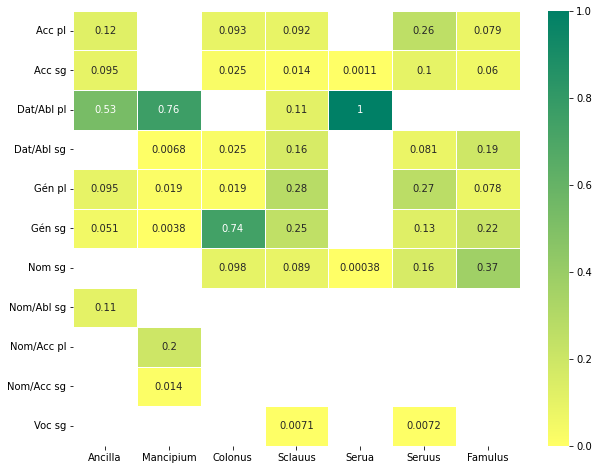

In [87]:
import numpy as np
import seaborn as sns
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_outer,vmin = 0, vmax = 1,annot=True,linewidths = 1,
               cmap='summer_r' )

results_path = 'results2.png'
plt.savefig(results_path, dpi=400)